In [174]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import copy, math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [146]:
data=pd.read_csv("./train.csv")
data1 = pd.read_csv("./Cellphone.csv")

# data = data.drop['blue', ''

In [154]:
data['premium'] = 0


c = 0
for i, row in data.iterrows():
    c +=1 
    if(row['battery_power'] > 1600 and row['int_memory'] > 32 and row['n_cores'] >= 6 and row['dual_sim'] == 1
       and row['wifi'] == 1):
        data.at[i, 'premium'] = 1
        print('row before',row['premium'])
        print('row before',data.loc[i, 'premium'])
print(c)

row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
row before 0.0
row before 1
2000


In [148]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,premium
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000,0.009000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314,0.094464
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,0.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,0.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [6]:
# from plotly.tools import FigureFactory as ff
# datahead=data.head(10)
# datahead=datahead.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
#                                    "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
#                                    ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
#                                    "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
# colorscale = "Greens"
# table = ff.create_table(datahead,colorscale=colorscale,height_constant=40)
# table.layout.width=2500
# for i in range(len(table.layout.annotations)):
#     table.layout.annotations[i].font.size = 8
# iplot(table)

In [141]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
premium          0
dtype: int64

In [264]:
for item in data.columns:
    print(item, "      ", data[item].unique(), 'LEN ', len(data[item].unique()))

battery_power        [ 842 1021  563 ... 1139 1467  858] LEN  1094
blue        [0 1] LEN  2
clock_speed        [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7] LEN  26
dual_sim        [0 1] LEN  2
fc        [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19] LEN  20
four_g        [0 1] LEN  2
int_memory        [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62] LEN  63
m_dep        [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2] LEN  10
mobile_wt        [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 14

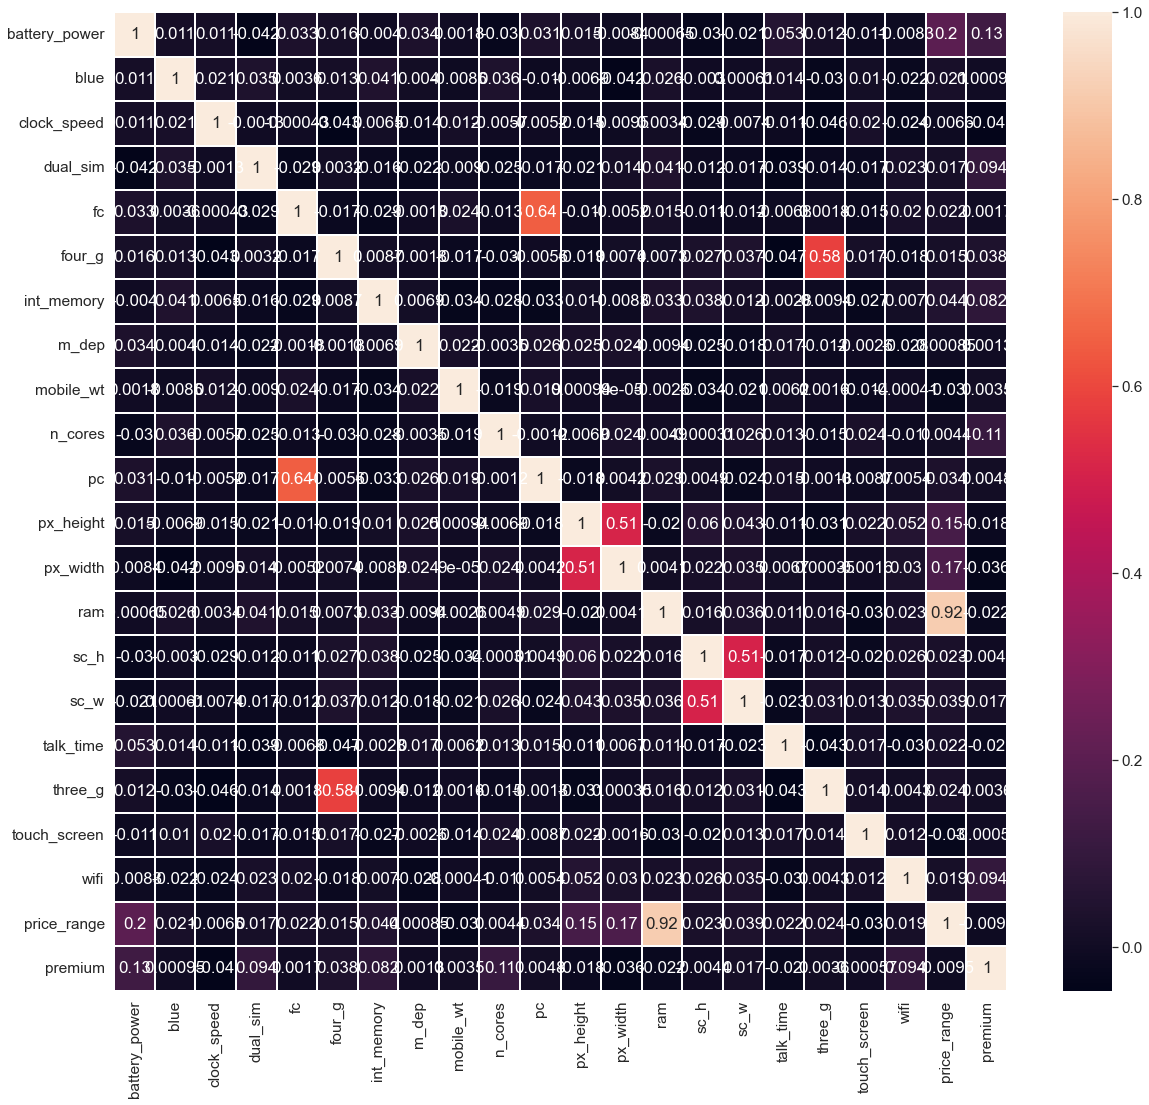

<Figure size 1440x864 with 0 Axes>

In [156]:

fig = plt.figure(figsize=(20,18))

sns.set(font_scale=1.4)
corr=data.corr()
sns.heatmap(corr, annot=True, linewidths = .4)


fig = plt.figure(figsize=(20,12))
plt.show()

In [157]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

C:\Users\chitchan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

C:\Users\chitchan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



In [150]:
#price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000e+00
ram              9.170457e-01
battery_power    2.007226e-01
px_width         1.658175e-01
px_height        1.488576e-01
int_memory       4.443496e-02
sc_w             3.871127e-02
pc               3.359930e-02
three_g          2.361122e-02
sc_h             2.298607e-02
fc               2.199821e-02
talk_time        2.185887e-02
blue             2.057285e-02
wifi             1.878481e-02
dual_sim         1.744448e-02
four_g           1.477171e-02
n_cores          4.399275e-03
m_dep            8.530365e-04
premium         -3.589786e-17
clock_speed     -6.605691e-03
mobile_wt       -3.030217e-02
touch_screen    -3.041107e-02
Name: price_range, dtype: float64

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

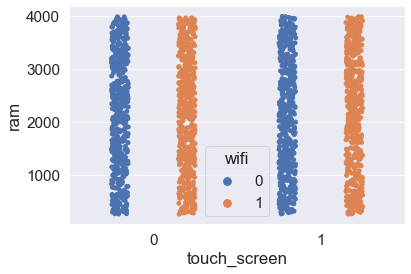

In [158]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y= "ram", hue="wifi",
              data=data, dodge=True)       

# Show the conditional means

# Improve the legend 
# handles, labels = ax.get_legend_handles_labels()
# ax.legend( title="Price Range",
#           handletextpad=0, columnspacing=1,
#           loc="best", ncol=2, frameon=True)

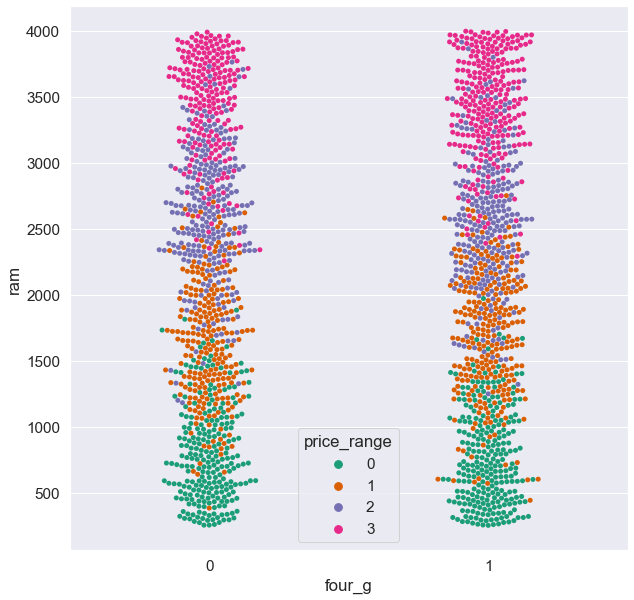

In [159]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=data)
ax=sns.set(style="darkgrid")

<AxesSubplot:xlabel='mobile_wt', ylabel='battery_power'>

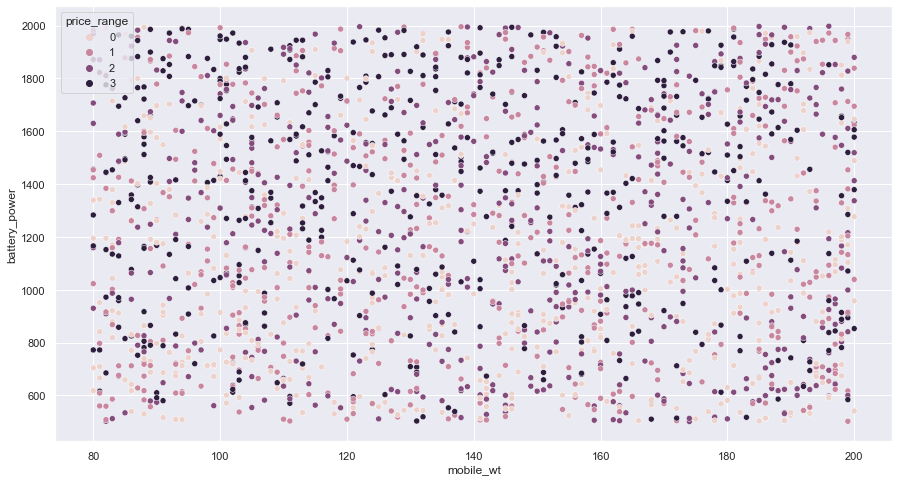

In [160]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x="mobile_wt", y="battery_power", hue="price_range")

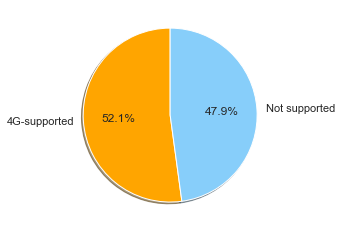

In [161]:
labels = ["4G-supported",'Not supported']
values = data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

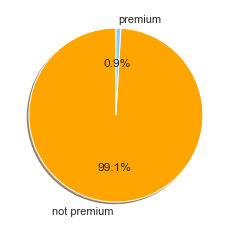

In [162]:
labels = ["not premium",'premium']
values = data['premium'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [164]:
import altair as alt
chart=alt.Chart(data).mark_bar().encode(
    alt.X('ram', bin=True),
    y='count(*):Q',
    color='price_range:N',
).facet(column='price_range:N')
render(chart)

NameError: name 'render' is not defined

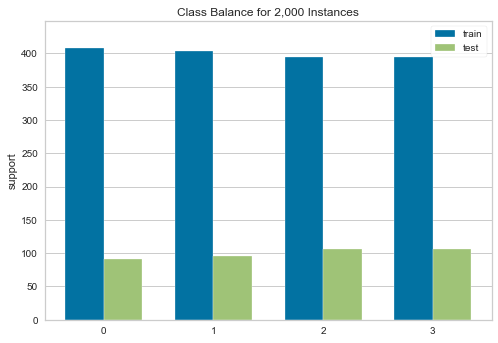

<AxesSubplot:title={'center':'Class Balance for 2,000 Instances'}, ylabel='support'>

In [165]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

train accuracy: 0.971875
test accuracy: 0.84
0.8705265926240618
MAE:  0.16
MSE:  0.16


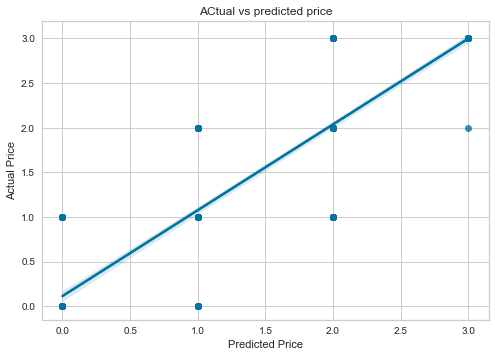

(400,) (400,)


In [166]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))
y_pred = svm.predict(x_test)

print(r2_score(y_test, y_pred))
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))

sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

print(y_pred.shape, y_test.shape)

0.9073938377231606
train accuracy: 0.9209115993384598
test accuracy: 0.9073938377231606
MAE:  0.2857179638050373
MSE:  0.11444038018766121


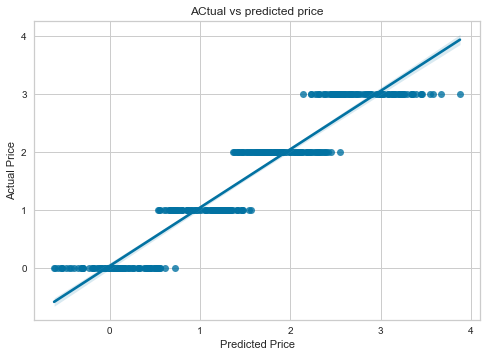

(400,) (400,)


In [171]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))
print("train accuracy:",lr.score(x_train,y_train))
print("test accuracy:",lr.score(x_test,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))

sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

print(y_pred.shape, y_test.shape)

In [339]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    
    [               
        ### START CODE HERE ### 
        tf.keras.layers.InputLayer((21,)),
        tf.keras.layers.Dense(8, activation="relu", name="L1"),
        tf.keras.layers.Dense(4, activation="softmax", name="L4")
        ### END CODE HERE ### 
    ], name = "my_model" 
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [340]:
[layer1, layer2] = model.layers

In [341]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
# W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
# print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (21, 8), b1 shape = (8,)
W2 shape = (8, 4), b2 shape = (4,)
W3 shape = (8, 4), b3 shape = (4,)


In [342]:
y = data['price_range']
X = data.drop(['price_range'] , axis = 1)

print(x_train.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'premium'],
      dtype='object')


In [356]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),          
)

history = model.fit(
    x_train,y_train,
    epochs=770
)

Epoch 1/770


C:\Users\chitchan\Anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



50/50 [==============================] - 1s 944us/step - loss: 0.0711
Epoch 2/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0689
Epoch 3/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 4/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0690
Epoch 5/770
50/50 [==============================] - 0s 895us/step - loss: 0.0673
Epoch 6/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0689
Epoch 7/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 8/770
50/50 [==============================] - 0s 862us/step - loss: 0.0679
Epoch 9/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0697
Epoch 10/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0689
Epoch 11/770
50/50 [==============================] - 0s 948us/step - loss: 0.0687
Epoch 12/770
50/50 [==============================] - 0s 1ms/step - loss: 0.0679
Epoch 13/770
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 0.0609
Epoch 103/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0624
Epoch 104/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0602
Epoch 105/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 106/770
50/50 [==============================] - 0s 5ms/step - loss: 0.0602
Epoch 107/770
50/50 [==============================] - 0s 6ms/step - loss: 0.0605
Epoch 108/770
50/50 [==============================] - 0s 6ms/step - loss: 0.0617
Epoch 109/770
50/50 [==============================] - 0s 6ms/step - loss: 0.0595
Epoch 110/770
50/50 [==============================] - 0s 6ms/step - loss: 0.0598
Epoch 111/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0599
Epoch 112/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0596
Epoch 113/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 114/770
50/50 [=========

50/50 [==============================] - 0s 7ms/step - loss: 0.0544
Epoch 203/770
50/50 [==============================] - 0s 5ms/step - loss: 0.0543
Epoch 204/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0539
Epoch 205/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 206/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 207/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 208/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0555
Epoch 209/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 210/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 211/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 212/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 213/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 214/770
50/50 [=========

50/50 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 303/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 304/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 305/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 306/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 307/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 308/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 309/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 310/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 311/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 312/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 313/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 314/770
50/50 [=========

50/50 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 403/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0456
Epoch 404/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 405/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0459
Epoch 406/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0456
Epoch 407/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0458
Epoch 408/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0457
Epoch 409/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0457
Epoch 410/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0456
Epoch 411/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 412/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 413/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 414/770
50/50 [=========

50/50 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 503/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 504/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 505/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0429
Epoch 506/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 507/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 508/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0415
Epoch 509/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0427
Epoch 510/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0418
Epoch 511/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0420
Epoch 512/770
50/50 [==============================] - 0s 6ms/step - loss: 0.0421
Epoch 513/770
50/50 [==============================] - 0s 5ms/step - loss: 0.0424
Epoch 514/770
50/50 [=========

50/50 [==============================] - 0s 3ms/step - loss: 0.0393
Epoch 603/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 604/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 605/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0393
Epoch 606/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0391
Epoch 607/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 608/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 609/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0409
Epoch 610/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 611/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 612/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0393
Epoch 613/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0392
Epoch 614/770
50/50 [=========

50/50 [==============================] - 0s 3ms/step - loss: 0.0384
Epoch 703/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 704/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 705/770
50/50 [==============================] - 0s 4ms/step - loss: 0.0374
Epoch 706/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 707/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0378
Epoch 708/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 709/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 710/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 711/770
50/50 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 712/770
50/50 [==============================] - 0s 5ms/step - loss: 0.0386
Epoch 713/770
50/50 [==============================] - 0s 5ms/step - loss: 0.0372
Epoch 714/770
50/50 [=========

In [357]:
prediction = model.predict(x_test) 


# print(prediction.shape, y_pred.shape)
# print(r2_score(y_test, prediction))
# # print("train accuracy:",model.score(x_train,y_train))
# # print("test accuracy:",model.score(x_test,y_test))
# print("MAE: ", (metrics.mean_absolute_error(prediction, y_test)))
# print("MSE: ", (metrics.mean_squared_error(prediction, y_test)))

# sns.regplot(x=prediction, y=y_test)
# plt.xlabel("Predicted Price")
# plt.ylabel('Actual Price')
# plt.title("ACtual vs predicted price")
# plt.show()



print(prediction[:8])
pred = []

prediction = pd.DataFrame(prediction)
for i, row in prediction.iterrows():
    index = -1
    m = -10000
    for j, v in row.iteritems():
        if v > m:
            index = j
            m = v
    pred.append( (index))

print(pred[:8])
print(y_test[:8])
print(pred[:40])
print(y_test[:40])

print("test accuracy:",r2_score(pred,y_test))



13/13 [==============================] - 0s 2ms/step
[[9.9999988e-01 1.6750317e-07 7.8479448e-25 0.0000000e+00]
 [6.8081957e-01 3.1918046e-01 2.3906436e-13 0.0000000e+00]
 [5.5111566e-04 9.9944884e-01 4.8611968e-09 4.0029241e-31]
 [7.1878798e-02 9.2812121e-01 1.8850869e-11 1.7082826e-36]
 [3.0639400e-34 1.2329883e-11 3.1320962e-01 6.8679029e-01]
 [6.1041091e-16 1.5410697e-02 9.8458928e-01 9.0735596e-12]
 [9.9886984e-01 1.1301792e-03 1.7594022e-15 0.0000000e+00]
 [4.6846982e-26 2.2532504e-07 9.9891281e-01 1.0870047e-03]]
[0, 0, 1, 1, 3, 2, 0, 2]
[0 0 1 1 2 2 0 2]
[0, 0, 1, 1, 3, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 1, 0, 0, 1]
[0 0 1 1 2 2 0 2 2 3 0 3 1 1 3 0 0 1 1 1 3 3 1 2 3 2 2 3 2 2 2 1 2 0 3 3 0
 0 0 1]
test accuracy: 0.9542200765773264


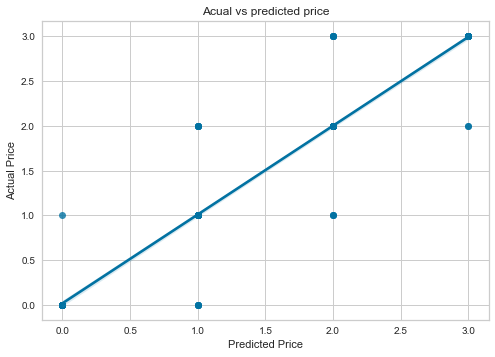

In [358]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Acual vs predicted price")
plt.show()
